In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import straggler_freq,task_hist,straggler_samples,slowest_impact,task_centers
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Slowest task Impact

In [2]:
dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)
dataWrangler = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/wrangler_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)

In [3]:
dataCO0 = dataComet[dataComet['Optimization']==0].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO1 = dataComet[dataComet['Optimization']==1].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO2 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO3 = dataComet[dataComet['Optimization']==3].drop(['Optimization'],axis=1).reset_index(drop='index')

dataWO0 = dataWrangler[dataWrangler['Optimization']==0].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO1 = dataWrangler[dataWrangler['Optimization']==1].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO2 = dataWrangler[dataWrangler['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO3 = dataWrangler[dataWrangler['Optimization']==3].drop(['Optimization'],axis=1).reset_index(drop='index')

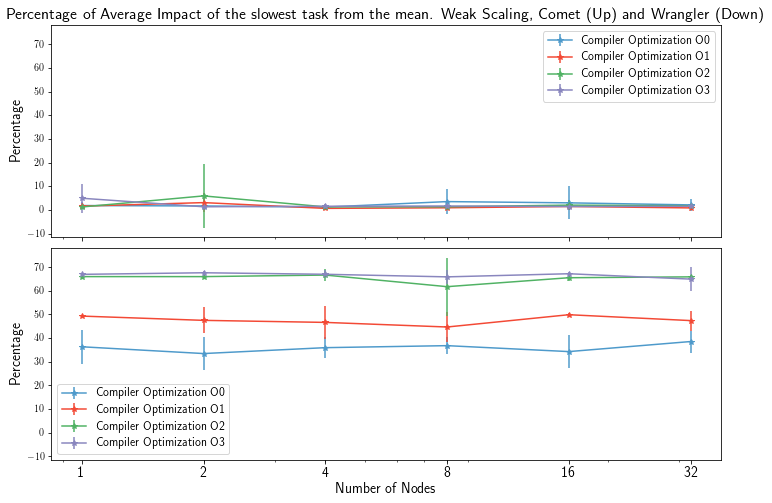

In [4]:
impactCO0 = slowest_impact(dataCO0,nodes=[1,2,4,8,16,32])
impactCO1 = slowest_impact(dataCO1,nodes=[1,2,4,8,16,32])
impactCO2 = slowest_impact(dataCO2,nodes=[1,2,4,8,16,32])
impactCO3 = slowest_impact(dataCO3,nodes=[1,2,4,8,16,32])

impactWO0 = slowest_impact(dataWO0,nodes=[1,2,4,8,16,32])
impactWO1 = slowest_impact(dataWO1,nodes=[1,2,4,8,16,32])
impactWO2 = slowest_impact(dataWO2,nodes=[1,2,4,8,16,32])
impactWO3 = slowest_impact(dataWO3,nodes=[1,2,4,8,16,32])

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO0],yerr=[np.std(D)*100 for D in impactCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO1],yerr=[np.std(D)*100 for D in impactCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO2],yerr=[np.std(D)*100 for D in impactCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO3],yerr=[np.std(D)*100 for D in impactCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO0],yerr=[np.std(D)*100 for D in impactWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO1],yerr=[np.std(D)*100 for D in impactWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO2],yerr=[np.std(D)*100 for D in impactWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO3],yerr=[np.std(D)*100 for D in impactWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Percentage',fontsize=14)
axes[1].set_ylabel('Percentage',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Percentage of Average Impact of the slowest task from the mean. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


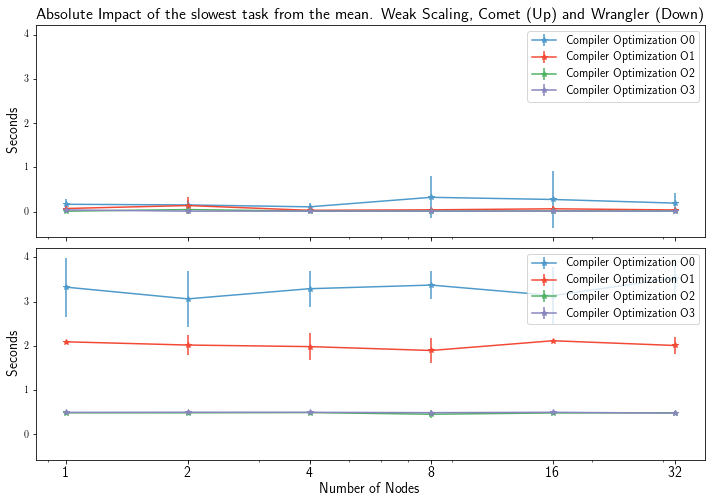

In [5]:
impactCO0 = slowest_impact(dataCO0,nodes=[1,2,4,8,16,32],center='meanabs')
impactCO1 = slowest_impact(dataCO1,nodes=[1,2,4,8,16,32],center='meanabs')
impactCO2 = slowest_impact(dataCO2,nodes=[1,2,4,8,16,32],center='meanabs')
impactCO3 = slowest_impact(dataCO3,nodes=[1,2,4,8,16,32],center='meanabs')

impactWO0 = slowest_impact(dataWO0,nodes=[1,2,4,8,16,32],center='meanabs')
impactWO1 = slowest_impact(dataWO1,nodes=[1,2,4,8,16,32],center='meanabs')
impactWO2 = slowest_impact(dataWO2,nodes=[1,2,4,8,16,32],center='meanabs')
impactWO3 = slowest_impact(dataWO3,nodes=[1,2,4,8,16,32],center='meanabs')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO0],yerr=[np.std(D) for D in impactCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO1],yerr=[np.std(D) for D in impactCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO2],yerr=[np.std(D) for D in impactCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO3],yerr=[np.std(D) for D in impactCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO0],yerr=[np.std(D) for D in impactWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO1],yerr=[np.std(D) for D in impactWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO2],yerr=[np.std(D) for D in impactWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO3],yerr=[np.std(D) for D in impactWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Absolute Impact of the slowest task from the mean. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


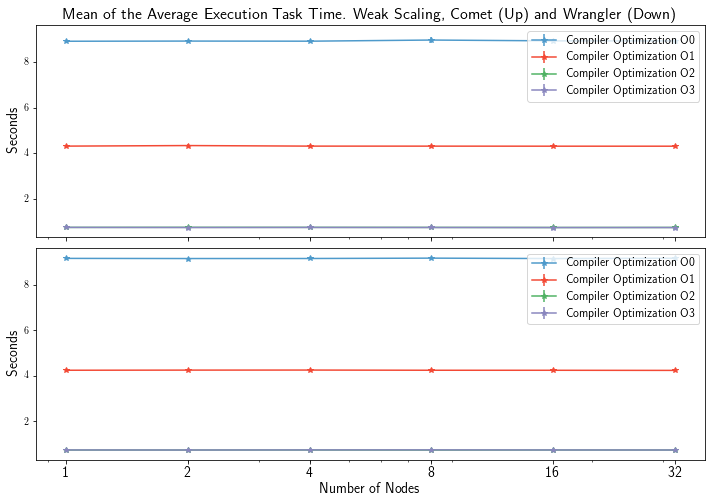

In [6]:
centersCO0 = task_centers(dataCO0,nodes=[1,2,4,8,16,32],measure='mean')
centersCO1 = task_centers(dataCO1,nodes=[1,2,4,8,16,32],measure='mean')
centersCO2 = task_centers(dataCO2,nodes=[1,2,4,8,16,32],measure='mean')
centersCO3 = task_centers(dataCO3,nodes=[1,2,4,8,16,32],measure='mean')
centersWO0 = task_centers(dataWO0,nodes=[1,2,4,8,16,32],measure='mean')
centersWO1 = task_centers(dataWO1,nodes=[1,2,4,8,16,32],measure='mean')
centersWO2 = task_centers(dataWO2,nodes=[1,2,4,8,16,32],measure='mean')
centersWO3 = task_centers(dataWO3,nodes=[1,2,4,8,16,32],measure='mean')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO0],yerr=[np.std(D)/1000000.0 for D in centersCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO1],yerr=[np.std(D)/1000000.0 for D in centersCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO2],yerr=[np.std(D)/1000000.0 for D in centersCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO3],yerr=[np.std(D)/1000000.0 for D in centersCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO0],yerr=[np.std(D)/1000000.0 for D in centersWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO1],yerr=[np.std(D)/1000000.0 for D in centersWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO2],yerr=[np.std(D)/1000000.0 for D in centersWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO3],yerr=[np.std(D)/1000000.0 for D in centersWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Mean of the Average Execution Task Time. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)
